# Regresión como modelo

Ahora que ya hemos visto dos ejemplos de modelización, vamos a ver cómo algunas librerías de Python, como sklearn, implementan modelos. 

Nos servirá para: 

* Reconocer conceptos que hemos aprendido en un caso de "caja negra" (sí, los data scientists usamos muchos modelos en modo caja negra). 

* Ver otro caso de uso (detectar puntos que se desvían del comportamiento esperado). 

* Introducir conceptos de aprendizaje supervisado. 

* Introducir el problema del overfitting.

Cargamos un dataset con 2 series de datos de vehículos y su consumo de gasolina. 

  <script type="text/javascript" src="https://ssl.gstatic.com/trends_nrtr/1243_RC12/embed_loader.js"></script>
  

In [1]:
import pandas as pd
import numpy as np

frm = pd.read_csv("auto-mpg.csv")
#frm.columns = ['date', 'FCB', 'RMA']
frm.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Nos quedamos con una columna cuyo dato es el desplazamiento del motor (displ) y otra columna es el consumo (en millas por galón). 

Pintar las series por separado, y luego una en función de la otra. 

Text(0.5, 1.0, ',pg')

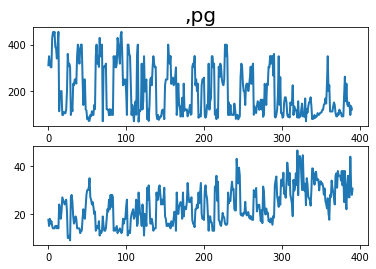

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fix, ax = plt.subplots(2, 1)
plt.style.use('fivethirtyeight')

ax[0].plot(frm['displ'], linewidth=2)
ax[0].set_title('displ')
ax[1].plot(frm['mpg'], linewidth=2)
ax[0].set_title(',pg')

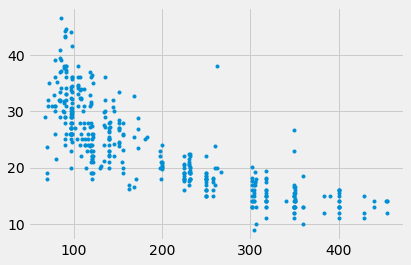

In [3]:
plt.plot(frm['displ'], frm['mpg'], '.')

Vemos en la gráfica que hay una tendencia inversa: cuanto mayor el desplazamiento, menor el consumo. 

Vamos a ajustar un modelo de regresión. Los modelos de regresión sirven para modelizar cuánto varía una variable Y cuando aumenta otra variable X. 

## Modelo

Una regresión lineal intenta cuantificarlo de esta forma: Y = m*X + b

Por ejemplo: b=40, m=0.05:

In [4]:
x = frm['displ'].values[:,None]
y = frm['mpg'].values[:,None]

m = -0.075
b = 50
xi = np.arange(x.min(), x.max(), 10)
yi = b + m*xi 

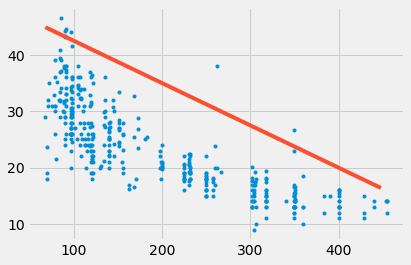

In [5]:
plt.plot(frm['displ'], frm['mpg'], '.')
plt.plot(xi, yi)

Usamos una línea para modelizar todo el conjunto de datos. Ésta es una de las maneras más sencillas de estimar el valor de `mpg` para nuevos casos donde se nos de el valor de `displ`.

La línea se especifica totalmente con los valores $m$ y $b$. Éstos se llaman los 'coeficientes' o 'parámetros' del modelo. 

¿Cómo de bueno es ese modelo? Se suele definir una función de ajuste, o de coste. 

* En el caso de la regresión, se puede definir el "error de predicción" de un punto como la distancia entre la estimación (o sea, la recta, y el punto). 

* Dado un punto $(x_i, y_i)$ y el modelo ($m$, $b$), el error absoluto se define como 
\begin{equation}
e_i = |y_i-mx_i-b|
\end{equation}

* Una métrica muy común es el error cuadrático:
\begin{equation}
e_i = (y_i-mx_i-b)^2,
\end{equation}
que penaliza más errores altos. 

* El "error total de ajuste" para todo el dataset puede ser una media de todos los errores. Por ejemplo, se define el error cuadrático medio (en inglés "mean squared error" (MSE)), como 
\begin{equation}
RMS (m, b)  = \frac{1}{N}\sum_i (y_i-mx_i-b)^2,
\end{equation}

Por ejemplo, para nuestro caso de m y b:

In [6]:
def rms(m, b): 
  return np.mean(np.square(y - m*x-b))
rms(m, b)

167.1723664700255

**La pregunta es: ¿cómo encontramos los valores de $m$ y $b$ que den el menor error total posible? 
## Ejemplo con sklearn

In [7]:
# Ejemplo de codigo en sklearn regresion fit y predict

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

print("m=", model.coef_, "b=", model.intercept_)

m= [[-0.06005143]] b= [35.12063594]


In [8]:
rms(model.coef_, model.intercept_)

21.37454494009465

In [9]:
np.mean(np.square(model.predict(x)-y))

21.37454494009465

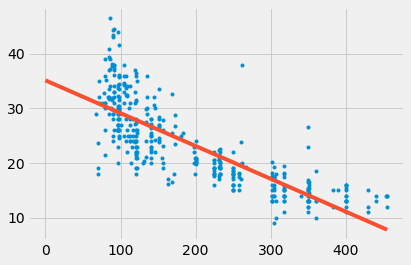

In [10]:
import numpy as np
xi = np.array([0, x.max()])[:, None]
yi = model.predict(xi)

plt.plot(x, y, '.')
plt.plot(xi, yi)

Para encontrar los valores de $m$ y $b$ que minimizan el error, sklearn ha utilizado internamente un algoritmo que se llama **optimizador**. 

Vamos a visualizar los errores, es decir, las diferencias para cada punto entre el valor de `mpg` estimado y el real.  

Esto puede servir para diagnosticar los errores que estamos haciendo. Si confiamos en el modelo, también nos podría servir para detectar "outliers": puntos que salen del valor esperado. Puntos en los que Y es mucho más alto o bajo de lo que el modelo esperaría. Es decir, vehículos que consumen mucho más o mucho menos de lo que se esperaría dado el valor de `displ`.

Esta gráfica se suele llamar *gráfica de residuos*:



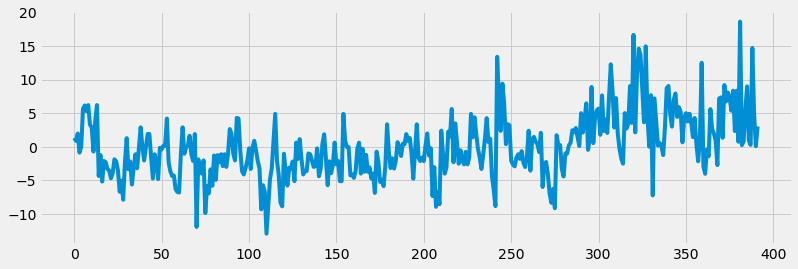

In [11]:
fig = plt.figure(figsize= (12,4))
plt.plot(y - model.predict(x))

En valor absoluto: 

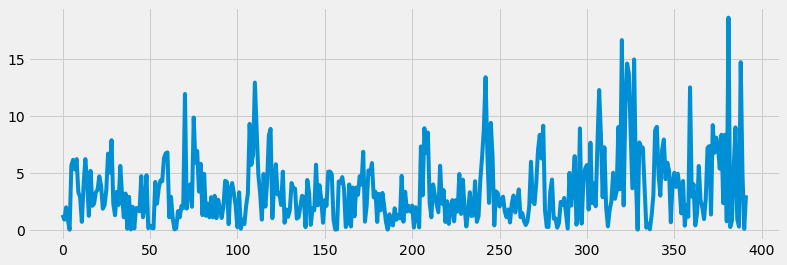

In [12]:
fig = plt.figure(figsize= (12,4))
residuals_1 = np.abs(y - model.predict(x))
plt.plot(residuals_1)

También podemos pintar la relación entre el valor real y el estimado: 

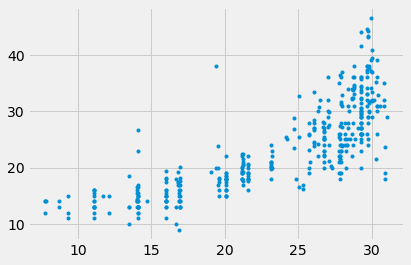

In [13]:
plt.plot(model.predict(x), y, '.')

## Uso de múltiples atributos

Aunque es difícil de pintar, se puede hacer una regresión usando más de un atributo. Por ejemplo, usando valores de `disp`y de `weight` a la vez. 

Primero, visualicemos la relación entre `accel` y `mpg`: 



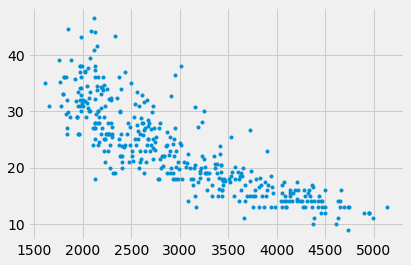

In [14]:
plt.plot(frm['weight'], frm['mpg'], '.')

En este caso, la relación es $y = w_0 + w_1x_1 + w_2x_2$. 

Para sklearn es indiferente: 


In [15]:
from sklearn.linear_model import LinearRegression

xx = frm[['displ', 'weight']].values
y = frm['mpg'].values[:,None]

model = LinearRegression()
model.fit(xx,y)

print("w1, w2=", model.coef_, "w0=", model.intercept_)

w1, w2= [[-0.01649711 -0.00575113]] w0= [43.7776194]


Lo que sí se puede pintar es la relación entre el valor de `mpg` real y estimado: 

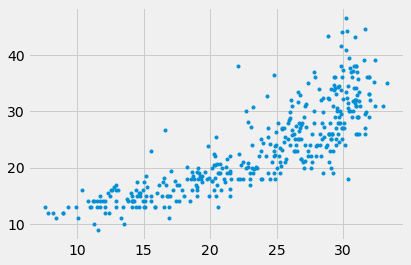

In [16]:
plt.plot(model.predict(xx), y, '.')

In [17]:
np.mean(np.square(y - model.predict(xx)))

18.291602397426125

## Comentario

En la clase, listaremos como ejemplo que los modelos la librería sklearn tienen fit y predict. Mismo para otros frameworks (keras, tf), matlab / R, ...

Hasta ahora no hemos comentado muchas desventajas de estas metodologías de modelización. Pero las tienen. Los siguientes problemas se debatirán en clase: 

* Overfitting (en interpolación se conoce como Fenomeno de Runge). Lo veremos en el ejemplo siguiente. 

* Domain adaptation

* Sesgo (y discriminacion)

* Adversariedad

## Tu primer ejemplo de overfitting

Podemos complicar el modelo de regresión. 

Vamos a ver el fenómeno de overfitting, que sucede cuando se usan modelos demasiado complicados. Vamos a verlo con un ejemplo, y en clase se introducirá la idea de underfitting / overfitting y capacidad del modelo. Aquí no vamos a ver teoría matemática sonre ello (que la hay), pero es un concepto que conviene conocer pronto porque aparece durante toda la vida del data scientist. 

(En otra clase más adelante se ve este tema, y métodos para evitarlo, como  la regularización). 

El ejemplo ajusta una regresión polinómica (es más complicada que la lineal), y vemos cómo a partir de cierto grado del polinomio sucede este efecto. 

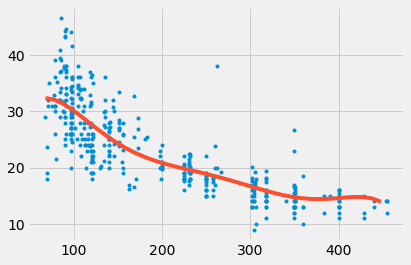

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=6)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
model = model.fit(x, y)
c = model.named_steps['linear'].coef_[0][::-1]

xi = np.arange(x.min(), x.max(), 10)
yi = np.array([np.polyval(c, s) for s in xi])
plt.plot(x, y, '.')
plt.plot(xi, yi)

# Take-home messages

* Existen muchos modelos ya disponibles en librerías populares y vas a utilizarlos. 

* La regresión es un tipo de modelo (específicamente un modelo estadístico),se usa para modelar el comportamiento esperado de una variable Y en función del valor de X. 

* En la librería sklearn de python está implementada y se usa en pocas líneas llamando a las funciones fit y predict de la clase LinearRegression. 

* Se puede usar la regresión para detectar outliers

* Un modelo demasiado complejo puede dar lugar al fenómeno del overfitting. 

* (En otro notebook se introducirá el tema de train / test) 